In [2]:
import tensorflow as tf
from tensorflow import keras

train, test = keras.datasets.mnist.load_data()

x_train, _ = train
x_test, _ = test

# Reformat dataset
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_train[0]

11493376/11490434 [==============================] - 0s 0us/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
# Shuffle and split dataset into batches
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(64)

In [0]:
from rbm import RBM
import numpy as np

# Hyperparameters
epochs = 5
alpha = 0.01

model = RBM(visible_units=784, hidden_units=64)

def run(dataset, train=True):
    mean_cost = []
    for _, batch in enumerate(dataset):
        cost = model.train(batch, alpha) if train else model.evaluate(batch)
        mean_cost.append(cost)

    return np.mean(mean_cost)

In [5]:
for epoch in range(epochs):
    loss = run(train_dataset)
    print('End of epoch %d with loss %s' % (epoch, loss))

End of epoch 0 with loss 0.10844768
End of epoch 1 with loss 0.088863574
End of epoch 2 with loss 0.08696386
End of epoch 3 with loss 0.0858296
End of epoch 4 with loss 0.08558533


In [6]:
# Evaluation
print('Evaluation loss %s' % (run(test_dataset, train=False)))

Evaluation loss 0.08371189


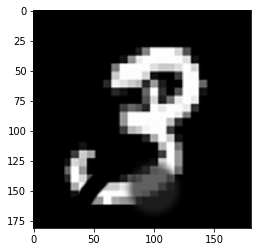

In [7]:
import matplotlib.pyplot as plt

from PIL import Image

img = Image.open('./imgs/3.jpg')

plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(img, cmap="gray")
plt.show()

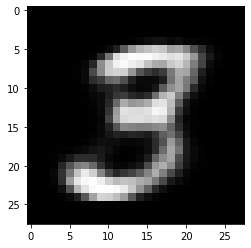

In [13]:
from imgs.utils import tile_raster_images
from rbm import PredictedOutput

sample_case = np.array(img.convert('I').resize((28, 28))).ravel().reshape((1, -1))/255.0
non_sample, sampled = model.predict(sample_case, predict_output=PredictedOutput.visible)
# Show reconstructed image
img = Image.fromarray(tile_raster_images(X=non_sample, img_shape=(28, 28), tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(img, cmap="gray")
plt.show()